# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count =+ 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"] 
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | gornyy
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | nabire
Processing Record 8 of Set 1 | tekkali
Processing Record 9 of Set 1 | ciudad bolivar
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | cill airne
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | lincoln city
Processing Record 14 of Set 1 | whakatane
Processing Record 15 of Set 1 | whitehorse
Processing Record 16 of Set 1 | porto novo
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | daru
Processing Record 21 of Set 1 | krasnaya gorbatka
Processing 

Processing Record 38 of Set 1 | balsas
Processing Record 39 of Set 1 | rabo de peixe
Processing Record 40 of Set 1 | ahau
City not found. Skipping...
Processing Record 41 of Set 1 | gizo
Processing Record 42 of Set 1 | punta del este
Processing Record 43 of Set 1 | kyzyl-mazhalyk
Processing Record 44 of Set 1 | weno
Processing Record 45 of Set 1 | guayaramerin
Processing Record 46 of Set 1 | baley
Processing Record 47 of Set 1 | constantia
Processing Record 48 of Set 1 | saint-julien-les-villas
Processing Record 49 of Set 1 | lompoc
Processing Record 0 of Set 1 | mount gambier
Processing Record 1 of Set 1 | phan rang-thap cham
Processing Record 2 of Set 1 | mil'kovo
Processing Record 3 of Set 1 | al ghayzah
Processing Record 4 of Set 1 | yarmouth
Processing Record 5 of Set 1 | rundu
Processing Record 6 of Set 1 | ar ruways
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | laojunmiao
Processing Record 9 of Set 1 | ermoupolis
Processing Record 10 of Set 1 | paita

Processing Record 30 of Set 1 | carepa
Processing Record 31 of Set 1 | mount pearl
Processing Record 32 of Set 1 | puerto leguizamo
Processing Record 33 of Set 1 | samraong
Processing Record 34 of Set 1 | aswan
Processing Record 35 of Set 1 | rudnichnyy
Processing Record 36 of Set 1 | kodinsk
Processing Record 37 of Set 1 | covington
Processing Record 38 of Set 1 | maloye ganyushkino
Processing Record 39 of Set 1 | revuca
Processing Record 40 of Set 1 | torghay
Processing Record 41 of Set 1 | st. john's
Processing Record 42 of Set 1 | betio village
Processing Record 43 of Set 1 | pleasanton
Processing Record 44 of Set 1 | binzhou
Processing Record 45 of Set 1 | america dourada
Processing Record 46 of Set 1 | shingu
Processing Record 47 of Set 1 | sitampiky
City not found. Skipping...
Processing Record 48 of Set 1 | prado
Processing Record 49 of Set 1 | gardabani
Processing Record 0 of Set 1 | novodvinsk
Processing Record 1 of Set 1 | mount isa
Processing Record 2 of Set 1 | tahmoor
Pro

Processing Record 23 of Set 1 | chilecito
Processing Record 24 of Set 1 | mili
Processing Record 25 of Set 1 | goundam
Processing Record 26 of Set 1 | kalabo
Processing Record 27 of Set 1 | griffith
Processing Record 28 of Set 1 | ceelbuur
Processing Record 29 of Set 1 | santa rosalia
Processing Record 30 of Set 1 | sabang
Processing Record 31 of Set 1 | bokoro
Processing Record 32 of Set 1 | dhankuta
Processing Record 33 of Set 1 | greymouth
Processing Record 34 of Set 1 | nadi
Processing Record 35 of Set 1 | cannonvale
Processing Record 36 of Set 1 | susuman
Processing Record 37 of Set 1 | lapinlahti
Processing Record 38 of Set 1 | tokonou
Processing Record 39 of Set 1 | labrador city
Processing Record 40 of Set 1 | plymouth
Processing Record 41 of Set 1 | cadale
Processing Record 42 of Set 1 | shetpe
Processing Record 43 of Set 1 | alotau
City not found. Skipping...
Processing Record 44 of Set 1 | malango
Processing Record 45 of Set 1 | mhamid
Processing Record 46 of Set 1 | smither

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data
                        

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,59.77,85,63,8.01,PT,1683867896
1,gornyy,55.1153,83.9059,43.90,77,60,13.02,RU,1683868376
2,bethel,41.3712,-73.4140,59.94,75,0,3.44,US,1683867893
3,yellowknife,62.4560,-114.3525,54.12,43,75,4.61,CA,1683867894
4,port-aux-francais,-49.3500,70.2167,46.85,91,100,46.42,TF,1683867895


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,59.77,85,63,8.01,PT,1683867896
1,gornyy,55.1153,83.9059,43.90,77,60,13.02,RU,1683868376
2,bethel,41.3712,-73.4140,59.94,75,0,3.44,US,1683867893
3,yellowknife,62.4560,-114.3525,54.12,43,75,4.61,CA,1683867894
4,port-aux-francais,-49.3500,70.2167,46.85,91,100,46.42,TF,1683867895


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

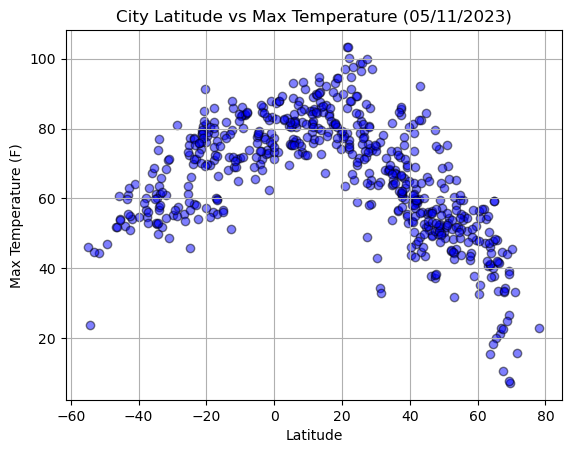

In [25]:
# Build scatter plot for latitude vs. temperature
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Max Temp"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

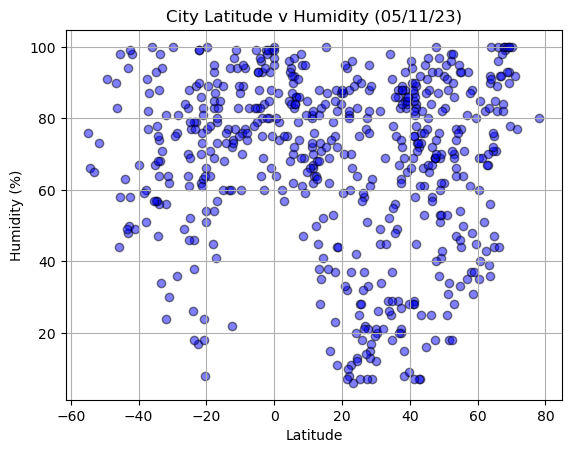

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Humidity"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.title(f"City Latitude v Humidity (%s) ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

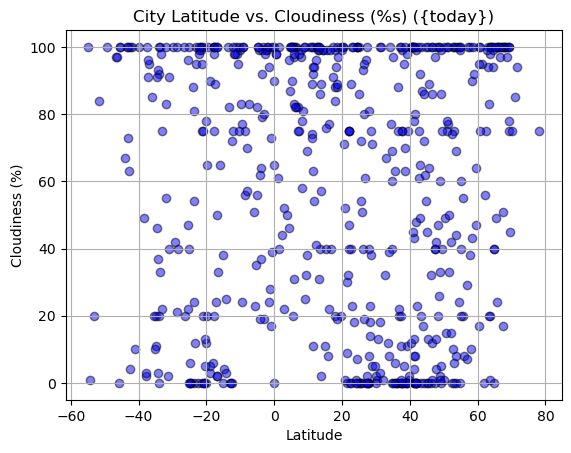

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Cloudiness"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%s) ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

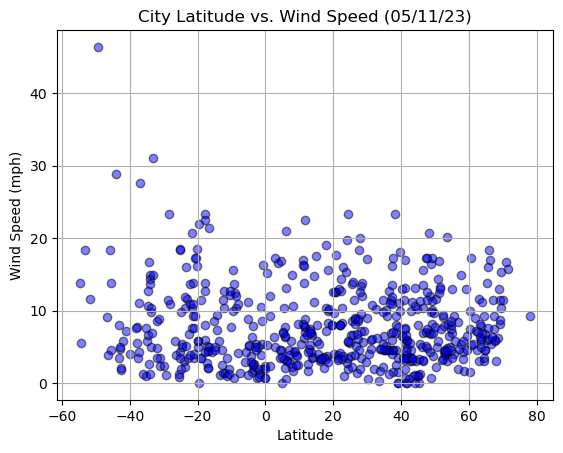

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Wind Speed"]).astype(float), facecolors="blue", edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (%s)" ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots


In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,59.77,85,63,8.01,PT,1683867896
1,gornyy,55.1153,83.9059,43.90,77,60,13.02,RU,1683868376
2,bethel,41.3712,-73.4140,59.94,75,0,3.44,US,1683867893
3,yellowknife,62.4560,-114.3525,54.12,43,75,4.61,CA,1683867894
7,tekkali,18.6167,84.2333,94.35,44,88,8.28,IN,1683868377


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,46.85,91,100,46.42,TF,1683867895
5,adamstown,-25.0660,-130.1015,72.37,61,100,18.50,PN,1683867892
6,nabire,-3.3667,135.4833,86.02,69,100,2.55,ID,1683868001
11,blackmans bay,-43.0167,147.3167,60.93,48,73,4.72,AU,1683867892
13,whakatane,-37.9585,176.9854,56.77,60,2,7.78,NZ,1683868378


###  Temperature vs. Latitude Linear Regression Plot

Text(0, 40, 'y = -0.8x + 93.66')

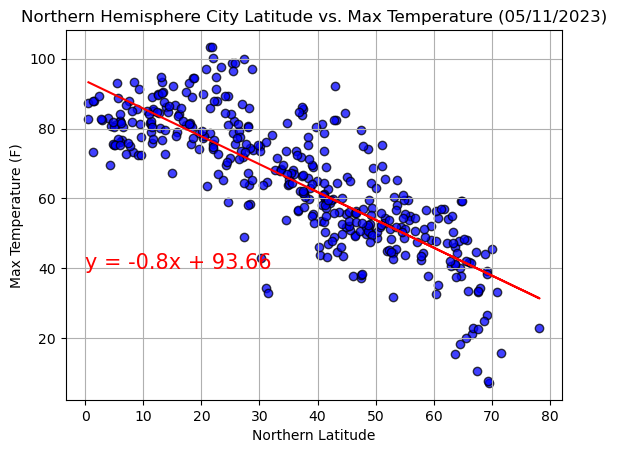

In [45]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature ({today})")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,40),fontsize=15,color='red')

Text(0, 40, 'y = 0.6x + 81.24')

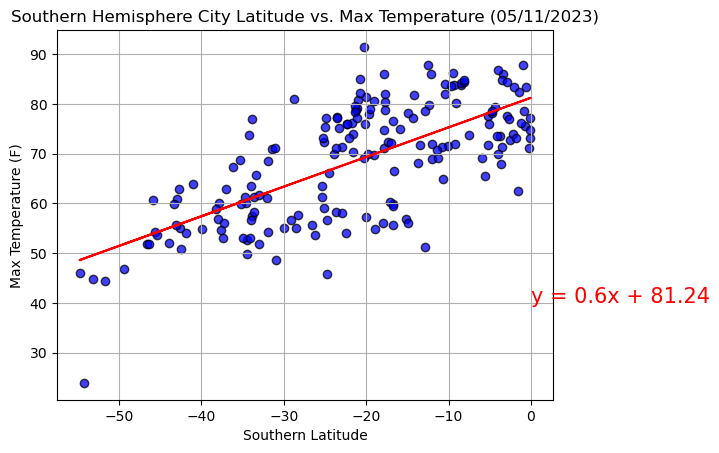

In [49]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Max Temperature ({today})")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,40),fontsize=15,color='red')

**Discussion about the linear relationship:** As cities in the northern hemisphere move farther from the equator, temperatures drop. And as some cities in the southern hemisphere move closer to the equator, temperatures rise. This proves a negative correlation between latitude and tempuratures in the northern hemisphere, and a positive correlation between latitude and temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

Text(-50, 30, 'y = 0.1x + 60.92')

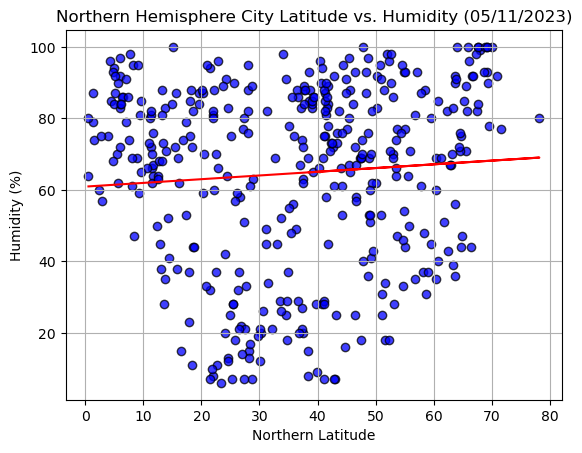

In [51]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Humidity ({today})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')

Text(-50, 30, 'y = 0.4x + 81.76')

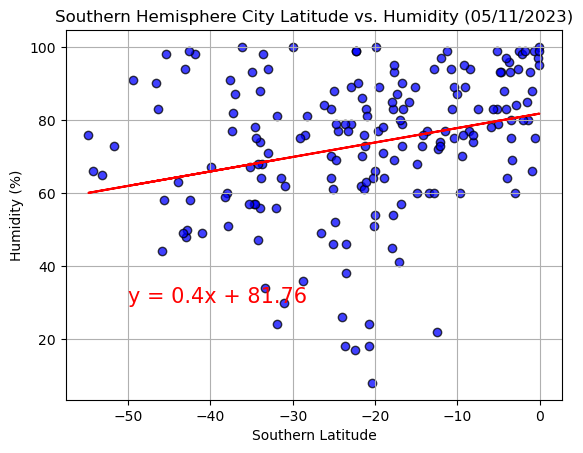

In [52]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Humidity ({today})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')

**Discussion about the linear relationship:** There is little correlation between humidity and latitude for cities in the northern hemisphere. And there is a slight positive correlation between humidity and latitude for cities in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

Text(0, 10, 'y = -0.1x + 60.31')

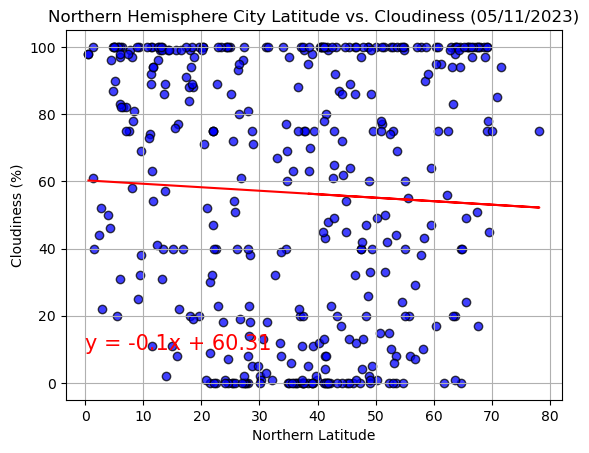

In [53]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness ({today})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,10),fontsize=15,color='red')

Text(-55, 0, 'y = 0.16x + 63.22')

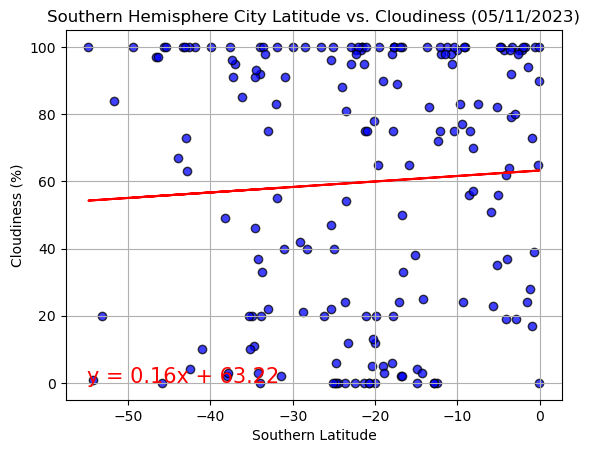

In [55]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness ({today})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-55,0),fontsize=15,color='red')

**Discussion about the linear relationship:** There is a slight negative correlation between cloudiness and latitude for cities in the northern hemisphere. And there is a little correlation between cloudiness and latitude for cities in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

Text(0, 22, 'y = 0.01x + 7.28')

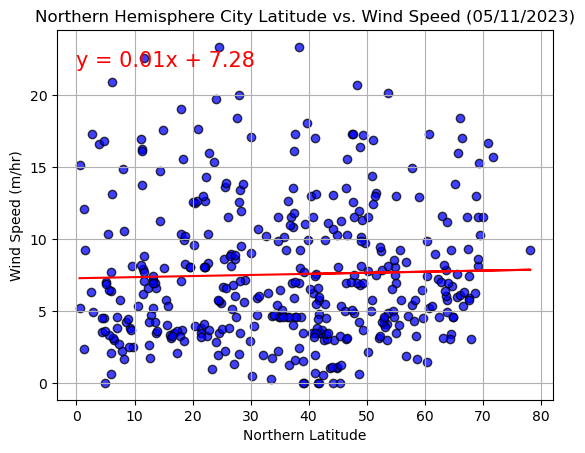

In [56]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Northern Latitude')
plt.ylabel('Wind Speed (m/hr)')
plt.grid()
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed ({today})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(0,22),fontsize=15,color='red')

Text(-50, 30, 'y = -0.14x + 5.02')

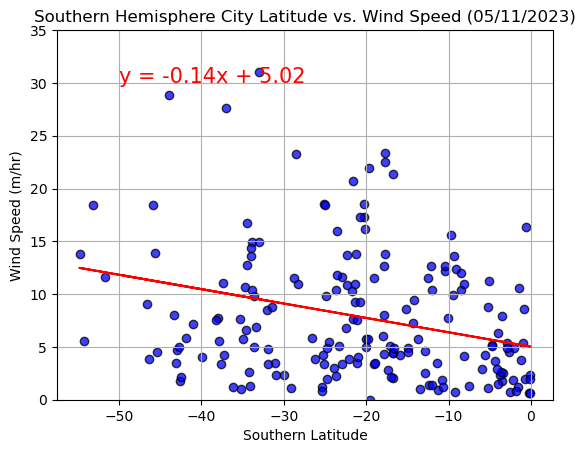

In [57]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
plt.scatter(x_axis, y_axis, marker = "o", facecolors = "blue", edgecolors = "black", alpha = .75)
plt.xlabel('Southern Latitude')
plt.ylabel('Wind Speed (m/hr)')
plt.ylim(0,35)
plt.grid()
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed ({today})")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = x_axis * slope + intercept
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')

**Discussion about the linear relationship:** There is a little correlation between wind speed and latitude for cities in the northern hemisphere. And there is a negative correlation between wind speed and latitude for cities in the southern hemisphere.